In [1]:
from __future__ import print_function
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import pandas as pd
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam
from keras.layers.core import Activation, Flatten, Dropout, Dense
import livelossplot

Using TensorFlow backend.


ModuleNotFoundError: No module named 'livelossplot'

In [34]:
kitchenware = pickle.load(open('/content/drive/My Drive/dataset.pkl', 'rb'))
kitchenware.values.shape

(28448, 3)

In [35]:
kitchenware.head()

,label,image,path
0,rodillo,"[[[200, 207, 204], [241, 248, 245], [147, 153,...",../dataset/images/rodillo/images_red/rodillo_3...
1,rodillo,"[[[29, 34, 33], [38, 42, 43], [177, 178, 182],...",../dataset/images/rodillo/images_red/rodillo_7...
2,rodillo,"[[[95, 132, 160], [99, 136, 164], [108, 141, 1...",../dataset/images/rodillo/images_red/rodillo85...
3,rodillo,"[[[77, 80, 78], [80, 83, 81], [90, 90, 90], [8...",../dataset/images/rodillo/images_red/rodillo_2...
4,rodillo,"[[[94, 98, 99], [97, 101, 102], [98, 102, 103]...",../dataset/images/rodillo/images_red/rodillo_1...


In [0]:
dummies = pd.get_dummies(kitchenware['label'])

In [37]:
dummies.head()

,cuchara,cuchillo,cuenco,hervidor,otro,pelador,rodillo,tenedor,tostadora,vaso
0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,1,0,0,0


In [0]:
dummies['gt'] = dummies.apply(lambda x: pd.Series([x.values]), axis=1)

In [39]:
dummies.head()

,cuchara,cuchillo,cuenco,hervidor,otro,pelador,rodillo,tenedor,tostadora,vaso,gt
0,0,0,0,0,0,0,1,0,0,0,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0]"
1,0,0,0,0,0,0,1,0,0,0,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0]"
2,0,0,0,0,0,0,1,0,0,0,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0]"
3,0,0,0,0,0,0,1,0,0,0,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0]"
4,0,0,0,0,0,0,1,0,0,0,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0]"


In [0]:
X = np.stack(kitchenware['image'])
y = np.stack(dummies['gt'])

In [48]:
print(X.shape)
print(y.shape)

(28448, 64, 64, 3)
(28448, 10)


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [50]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(22758, 64, 64, 3)
(5690, 64, 64, 3)
(22758, 10)
(5690, 10)


In [51]:
num_classes = 10
img_rows = 64
img_cols = 64

# Incoming data is in uint8. Cast the input data images to be floats in range [0.0-1.0]  
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

print('x_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices



x_train shape: (22758, 64, 64, 3)
22758 train samples
5690 test samples


In [52]:
model = Sequential()
chanDim = -1

if K.image_data_format() == "channels_first":
    chanDim = 1
model.add(Conv2D(32, (3, 3), padding="same", input_shape=X_train.shape[1:]))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation("softmax"))

model.summary()

# CNN params

EPOCHS = 18
INIT_LR = 1e-3
BS = 32
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)

#Training the model

model.compile(loss='categorical_crossentropy',
                optimizer=opt, metrics=['accuracy'])

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_37 (Conv2D)           (None, 64, 64, 32)        896       
_________________________________________________________________
activation_29 (Activation)   (None, 64, 64, 32)        0         
_________________________________________________________________
batch_normalization_35 (Batc (None, 64, 64, 32)        128       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 21, 21, 32)        0         
_________________________________________________________________
dropout_26 (Dropout)         (None, 21, 21, 32)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 21, 21, 64)        18496     
_________________________________________________________________
activation_30 (Activation)   (None, 21, 21, 64)       

In [53]:
%time
model.fit(X_train, y_train,
        batch_size=BS,
        epochs=EPOCHS,
        verbose=1,
        validation_data=(X_test, y_test))

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.96 µs
Train on 22758 samples, validate on 5690 samples
Epoch 1/18
22758/22758 [==============================] - 13s 573us/step - loss: 0.3775 - acc: 0.8823 - val_loss: 0.0884 - val_acc: 0.9703
Epoch 2/18
22758/22758 [==============================] - 10s 455us/step - loss: 0.0852 - acc: 0.9710 - val_loss: 0.2301 - val_acc: 0.9494
Epoch 3/18
22758/22758 [==============================] - 10s 445us/step - loss: 0.0474 - acc: 0.9846 - val_loss: 0.2514 - val_acc: 0.9200
Epoch 4/18
22758/22758 [==============================] - 10s 458us/step - loss: 0.0568 - acc: 0.9824 - val_loss: 0.0731 - val_acc: 0.9703
Epoch 5/18
22758/22758 [==============================] - 10s 455us/step - loss: 0.0284 - acc: 0.9906 - val_loss: 0.0534 - val_acc: 0.9810
Epoch 6/18
22758/22758 [==============================] - 10s 445us/step - loss: 0.0346 - acc: 0.9883 - val_loss: 0.0315 - val_acc: 0.9889
Epoch 7/18
22758/22758 [=============================

In [54]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 8.076659626282146e-05
Test accuracy: 1.0


In [0]:
from keras.models import load_model 
model.save('second_model.h5')

In [0]:
import json
model_json = model.to_json()
with open("second2_model.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("second2_model.h5")

In [0]:
Y_pred = model.predict(X_test)

[8 8 8 ... 4 8 4]
[8 8 8 ... 4 8 4]


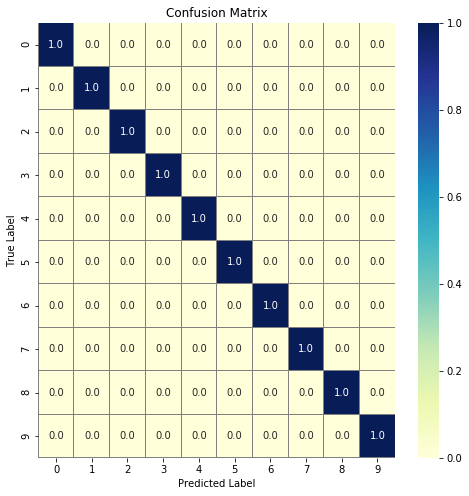

In [61]:
import matplotlib.pyplot as plt
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
print(Y_pred_classes)
Y_true = np.argmax(y_test,axis = 1)
print(Y_true)
# compute the confusion matrix
cm = confusion_matrix(Y_true, Y_pred_classes)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(cm, annot=True, linewidths=0.01,cmap="YlGnBu",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show();

In [0]:
class_names = list(dummies.columns)[:-1]

[1.1899862e-13 2.8069789e-14 1.8081693e-09 2.1650052e-15 3.5474973e-16
 4.8162510e-13 4.7088815e-14 1.6399774e-11 1.0000000e+00 1.7579312e-09]
cuchara: 0.0
cuchillo: 0.0
cuenco: 0.0
hervidor: 0.0
otro: 0.0
pelador: 0.0
rodillo: 0.0
tenedor: 0.0
tostadora: 1.0
vaso: 0.0
(1, 64, 64, 3)


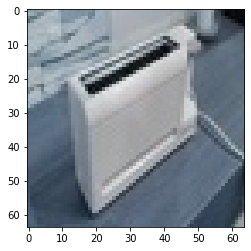

In [63]:
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image

img = X_test[150]
pred = model.predict(np.expand_dims(img,axis=0))[0]
print(pred)
for obj in class_names:
    print(f'{obj}: {round(pred[class_names.index(obj)],2)}')
print(np.expand_dims(img,axis=0).shape)
plt.imshow(img);

In [67]:
import cv2
a = cv2.imread('/content/drive/My Drive/cuenco.jpg')
print(a.shape)
a = cv2.resize(a,(64,64))
print(a.shape)
print(type(a))
print(a.shape)
a = a.astype('float32') / 255

(1984, 3968, 3)
(64, 64, 3)
<class 'numpy.ndarray'>
(64, 64, 3)


[3.2768742e-07 8.4747938e-08 9.9994481e-01 1.0541127e-09 4.3965541e-05
 2.6847160e-09 1.0745405e-05 3.1567442e-09 2.6105218e-09 1.1955467e-07]
cuchara: 0.0
cuchillo: 0.0
cuenco: 1.0
hervidor: 0.0
otro: 0.0
pelador: 0.0
rodillo: 0.0
tenedor: 0.0
tostadora: 0.0
vaso: 0.0
(1, 64, 64, 3)


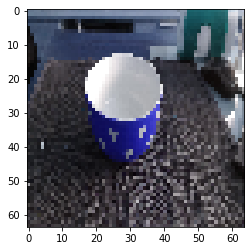

In [68]:
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image

img = a
pred = model.predict(np.expand_dims(img,axis=0))[0]
print(pred)
for obj in class_names:
    print(f'{obj}: {round(pred[class_names.index(obj)],2)}')
print(np.expand_dims(img,axis=0).shape)
plt.imshow(img);

In [69]:
import cv2
a = cv2.imread('/content/drive/My Drive/cuchara.jpg')
print(a.shape)
a = cv2.resize(a,(64,64))
print(a.shape)
print(type(a))
print(a.shape)
a = a.astype('float32') / 255

(3968, 1984, 3)
(64, 64, 3)
<class 'numpy.ndarray'>
(64, 64, 3)


[6.1763926e-18 1.7430844e-23 1.5466145e-17 3.2470852e-14 1.0000000e+00
 1.7738814e-22 2.5175321e-22 8.0150721e-26 4.8040411e-16 1.6285312e-15]
cuchara: 0.0
cuchillo: 0.0
cuenco: 0.0
hervidor: 0.0
otro: 1.0
pelador: 0.0
rodillo: 0.0
tenedor: 0.0
tostadora: 0.0
vaso: 0.0
(1, 64, 64, 3)


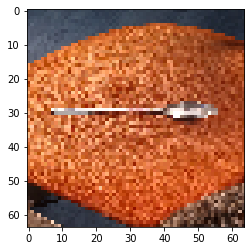

In [70]:
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image

img = a
pred = model.predict(np.expand_dims(img,axis=0))[0]
print(pred)
for obj in class_names:
    print(f'{obj}: {round(pred[class_names.index(obj)],2)}')
print(np.expand_dims(img,axis=0).shape)
plt.imshow(img);

In [71]:
import cv2
a = cv2.imread('/content/drive/My Drive/pelador.jpg')
print(a.shape)
a = cv2.resize(a,(64,64))
print(a.shape)
print(type(a))
print(a.shape)
a = a.astype('float32') / 255

(1984, 3968, 3)
(64, 64, 3)
<class 'numpy.ndarray'>
(64, 64, 3)


[1.1915075e-02 1.6038273e-02 2.5451132e-05 2.3845028e-02 3.0477121e-01
 4.2341790e-01 1.7936683e-01 2.2388498e-05 3.4978405e-02 5.6194412e-03]
cuchara: 0.009999999776482582
cuchillo: 0.019999999552965164
cuenco: 0.0
hervidor: 0.019999999552965164
otro: 0.30000001192092896
pelador: 0.41999998688697815
rodillo: 0.18000000715255737
tenedor: 0.0
tostadora: 0.029999999329447746
vaso: 0.009999999776482582
(1, 64, 64, 3)


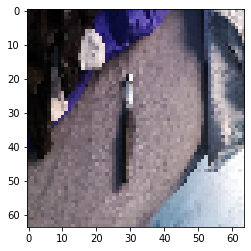

In [72]:
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image

img = a
pred = model.predict(np.expand_dims(img,axis=0))[0]
print(pred)
for obj in class_names:
    print(f'{obj}: {round(pred[class_names.index(obj)],2)}')
print(np.expand_dims(img,axis=0).shape)
plt.imshow(img);

In [73]:
a = cv2.imread('/content/drive/My Drive/cuchillo.jpg')
print(a.shape)
a = cv2.resize(a,(64,64))
print(a.shape)
print(type(a))
print(a.shape)
a = a.astype('float32') / 255

(1984, 3968, 3)
(64, 64, 3)
<class 'numpy.ndarray'>
(64, 64, 3)


[6.9220512e-08 5.2897536e-07 2.3332888e-07 5.9151205e-07 1.7532318e-05
 1.7819687e-13 8.7897999e-05 3.7851766e-10 5.0535971e-05 9.9984264e-01]
cuchara: 0.0
cuchillo: 0.0
cuenco: 0.0
hervidor: 0.0
otro: 0.0
pelador: 0.0
rodillo: 0.0
tenedor: 0.0
tostadora: 0.0
vaso: 1.0
(1, 64, 64, 3)


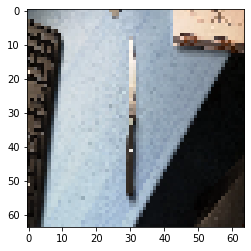

In [74]:
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image

img = a
pred = model.predict(np.expand_dims(img,axis=0))[0]
print(pred)
for obj in class_names:
    print(f'{obj}: {round(pred[class_names.index(obj)],2)}')
print(np.expand_dims(img,axis=0).shape)
plt.imshow(img);

In [75]:
a = cv2.imread('/content/drive/My Drive/cuenco2.jpg')
print(a.shape)
a = cv2.resize(a,(64,64))
print(a.shape)
print(type(a))
print(a.shape)
a = a.astype('float32') / 255

(1984, 3968, 3)
(64, 64, 3)
<class 'numpy.ndarray'>
(64, 64, 3)


[2.7130500e-06 4.2354324e-09 3.7527473e-03 1.9497367e-05 3.0959884e-05
 1.8739459e-09 1.2976623e-10 3.2027546e-07 1.9227683e-07 9.9619353e-01]
cuchara: 0.0
cuchillo: 0.0
cuenco: 0.0
hervidor: 0.0
otro: 0.0
pelador: 0.0
rodillo: 0.0
tenedor: 0.0
tostadora: 0.0
vaso: 1.0
(1, 64, 64, 3)


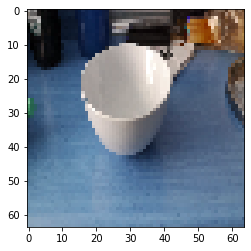

In [76]:
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image

img = a
pred = model.predict(np.expand_dims(img,axis=0))[0]
print(pred)
for obj in class_names:
    print(f'{obj}: {round(pred[class_names.index(obj)],2)}')
print(np.expand_dims(img,axis=0).shape)
plt.imshow(img);